In [1]:
import scanpy as sc
import pertpy as pt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import distance, linkage, dendrogram
from seaborn import clustermap
import seaborn as sns
import matplotlib.pyplot as plt
import episcanpy as epi
from scipy import stats
import edistance as ed
from utils import equal_subsampling

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

In [2]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 7})
fig_title = "Papalexi et al"
workingdir = "output/metric-comp-papalexi/"

In [6]:
dist_dfs = {}

#dist_dfs['mmd'] = pd.read_csv(workingdir + "mmd.csv", index_col=0)
dist_dfs['pseudobulk'] = pd.read_csv(workingdir + "pseudobulk.csv", index_col=0)
dist_dfs['wasserstein'] = pd.read_csv(workingdir + "wasserstein.csv", index_col=0)
dist_dfs['edist'] = pd.read_csv(workingdir + "edist.csv", index_col=0)
dist_dfs['mmd_gauss'] = pd.read_csv(workingdir + "mmd_rbf_gamma_0pt05.csv", index_col=0)
adata = sc.read_h5ad(workingdir + "papalexi_processed_subset.h5ad")


In [7]:
magnitudes = pd.concat([dist_dfs[key]['control'] for key in dist_dfs], axis=1, keys =[key for key in dist_dfs] )

In [8]:
# remove the corresponding 0 row

magnitudes = magnitudes[magnitudes['edist']!=0]
magnitudes['perturbation']= magnitudes.index


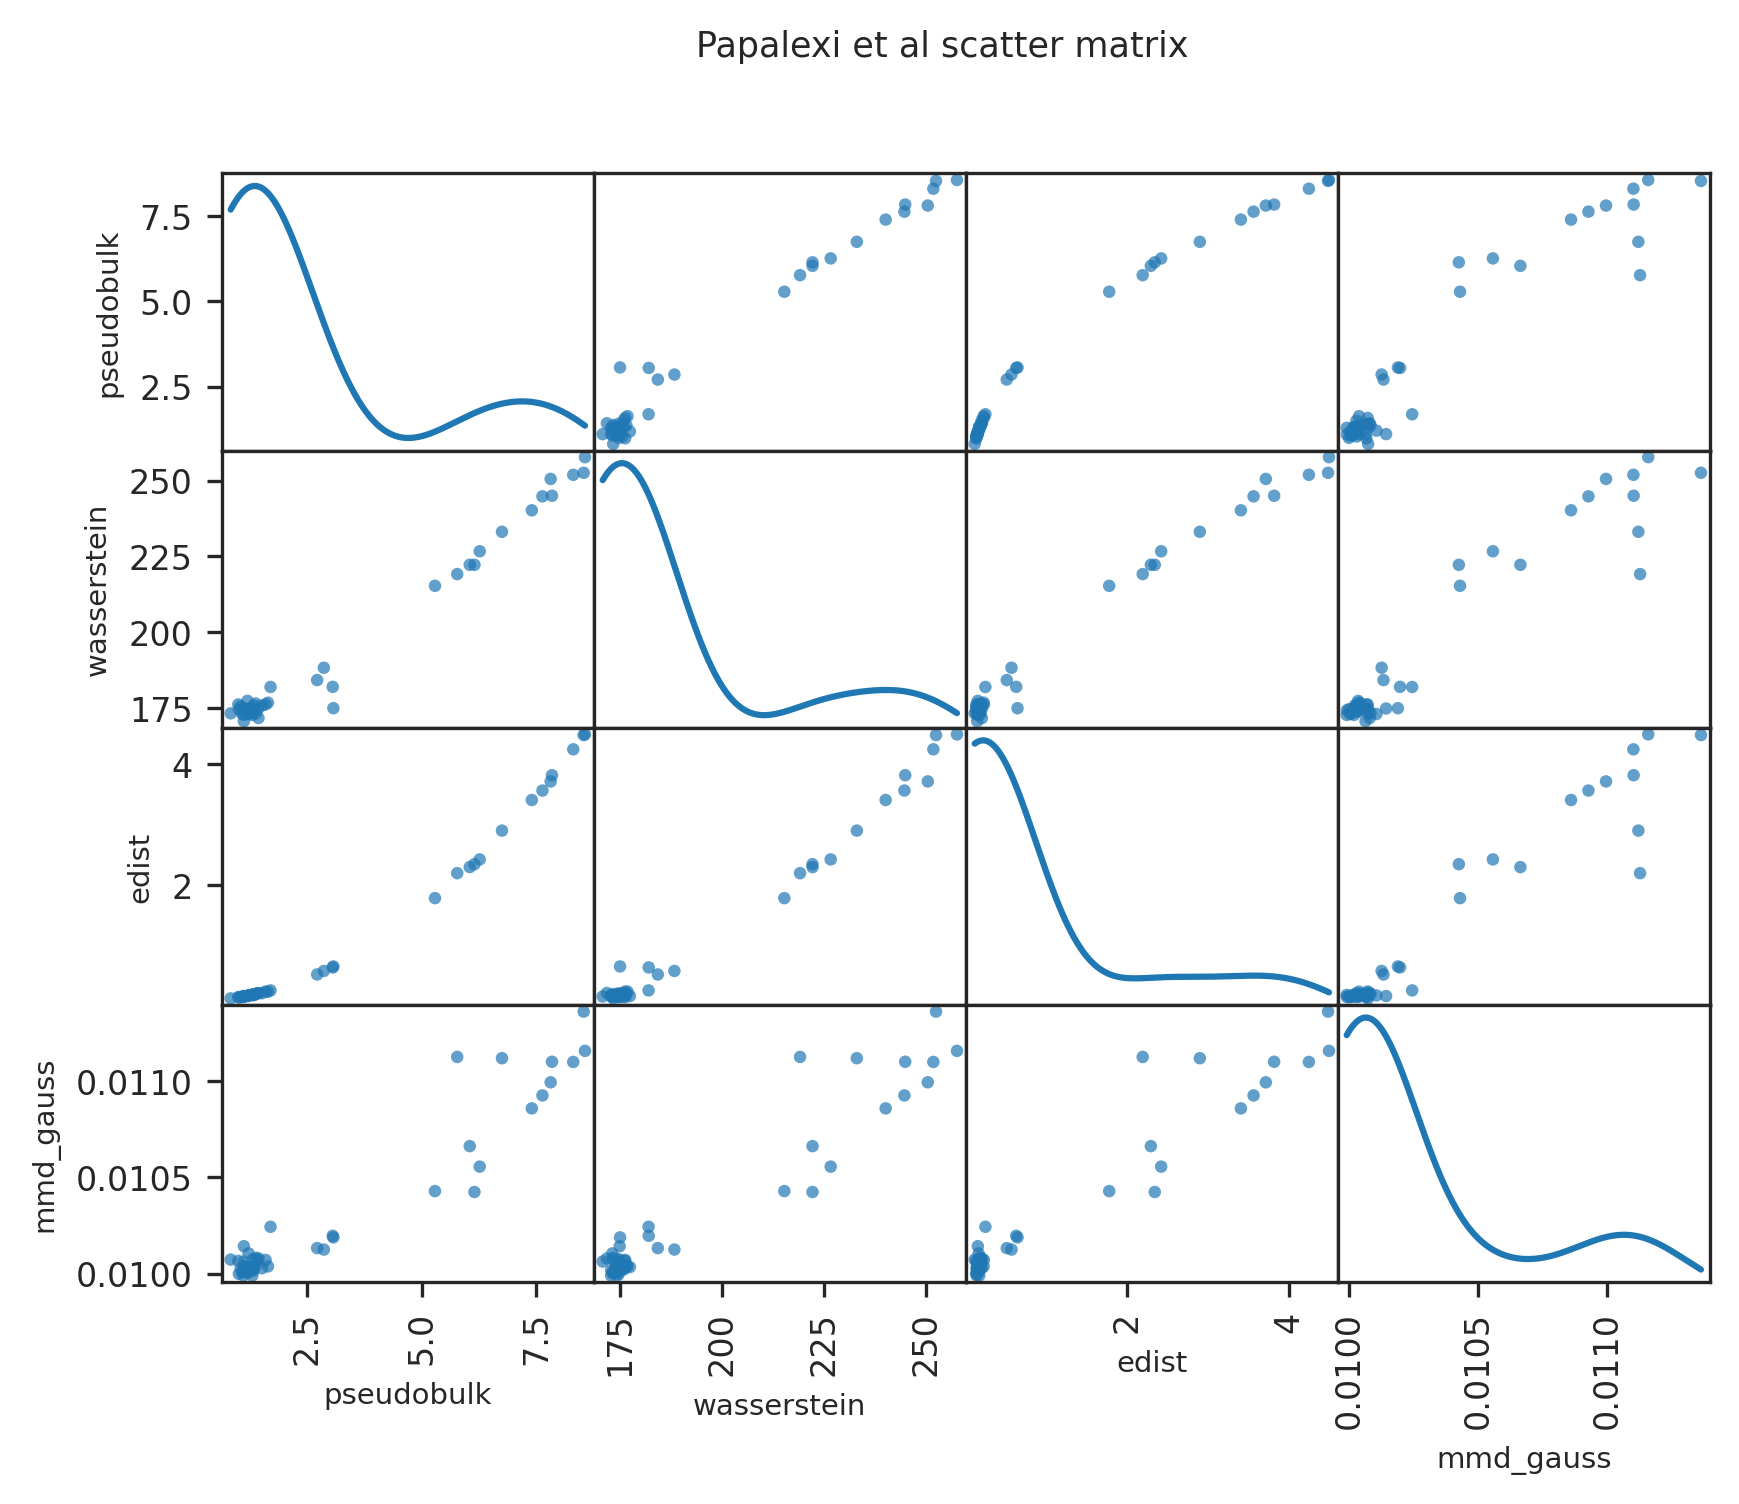

In [9]:
pd.plotting.scatter_matrix(magnitudes, alpha = .7, diagonal = "kde")
plt.suptitle(fig_title  + " scatter matrix")
plt.savefig(workingdir + "scatter_matrix.pdf")

In [10]:
magma = pd.melt(magnitudes, id_vars= "perturbation")
magma.columns = ['perturbation','metric','distance']
magma = magma[magma['perturbation']!="control"]


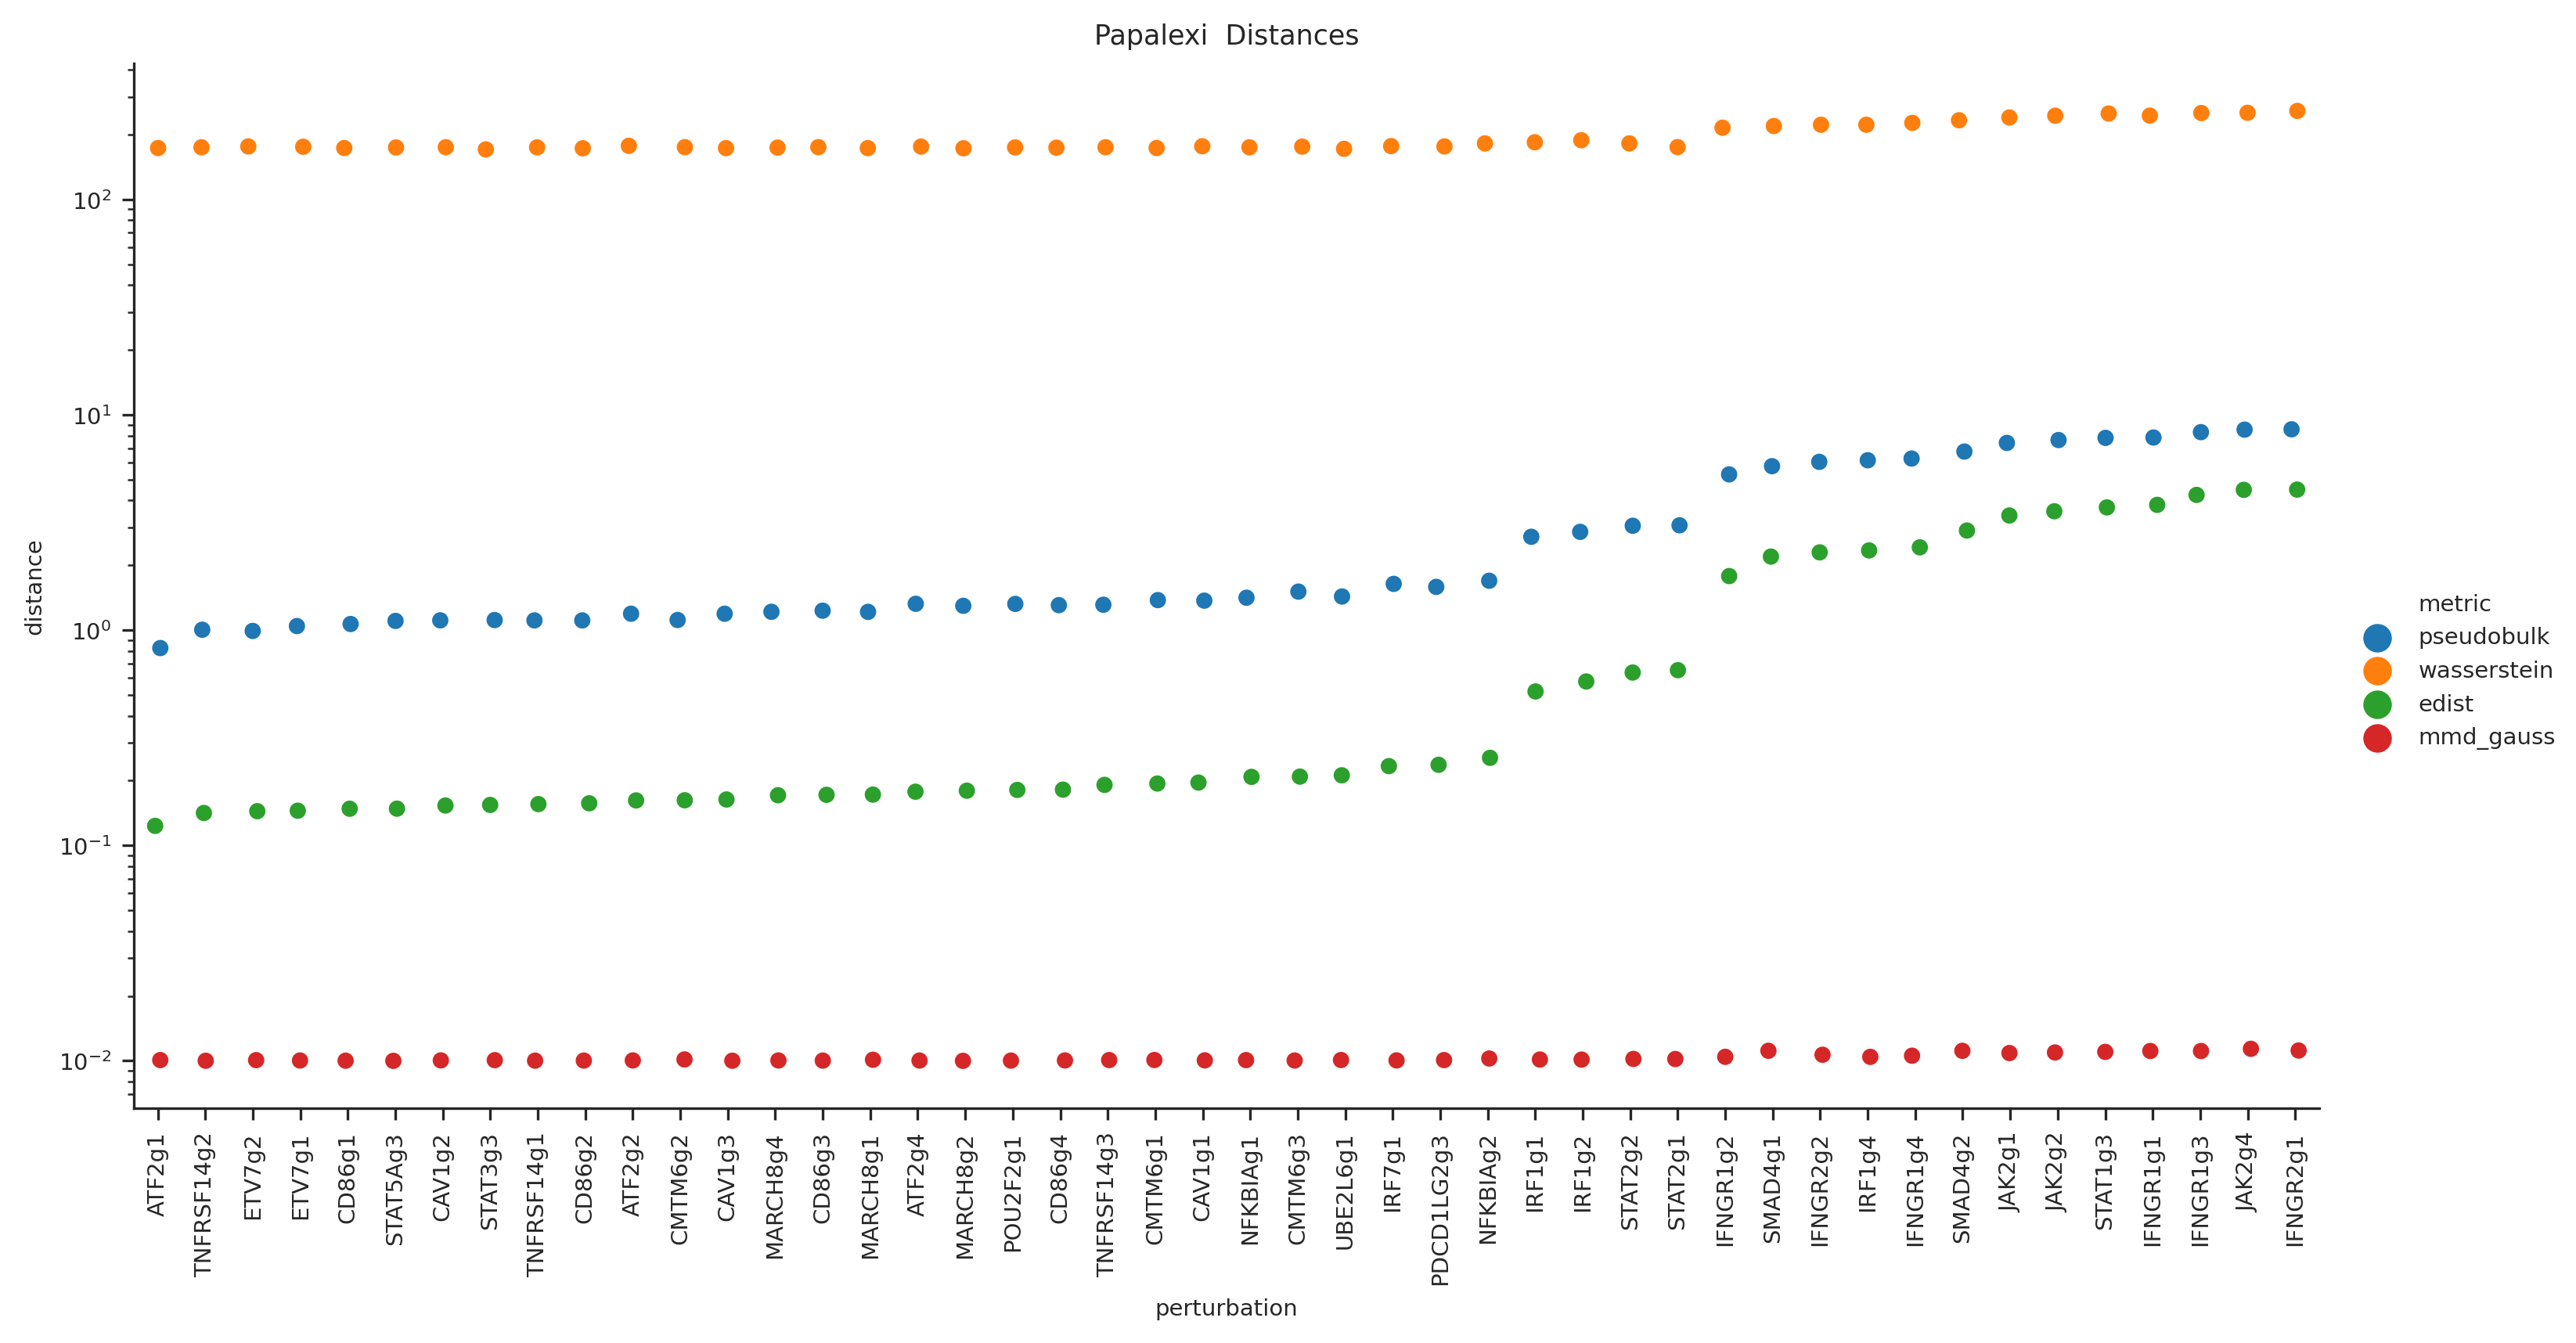

In [11]:
g2 = sns.catplot(data = magma, x = 'perturbation', y = 'distance', hue = 'metric', order =magnitudes.sort_values('edist')['perturbation'] ,
                aspect=2)
#g2.set(xticklabels=[])  
g2.set(title="Papalexi  Distances")
#g2.set_yscale("log")
plt.xticks(rotation=90)
plt.yscale("log")
plt.savefig(workingdir + "catplot_log.pdf", bbox_inches="tight")

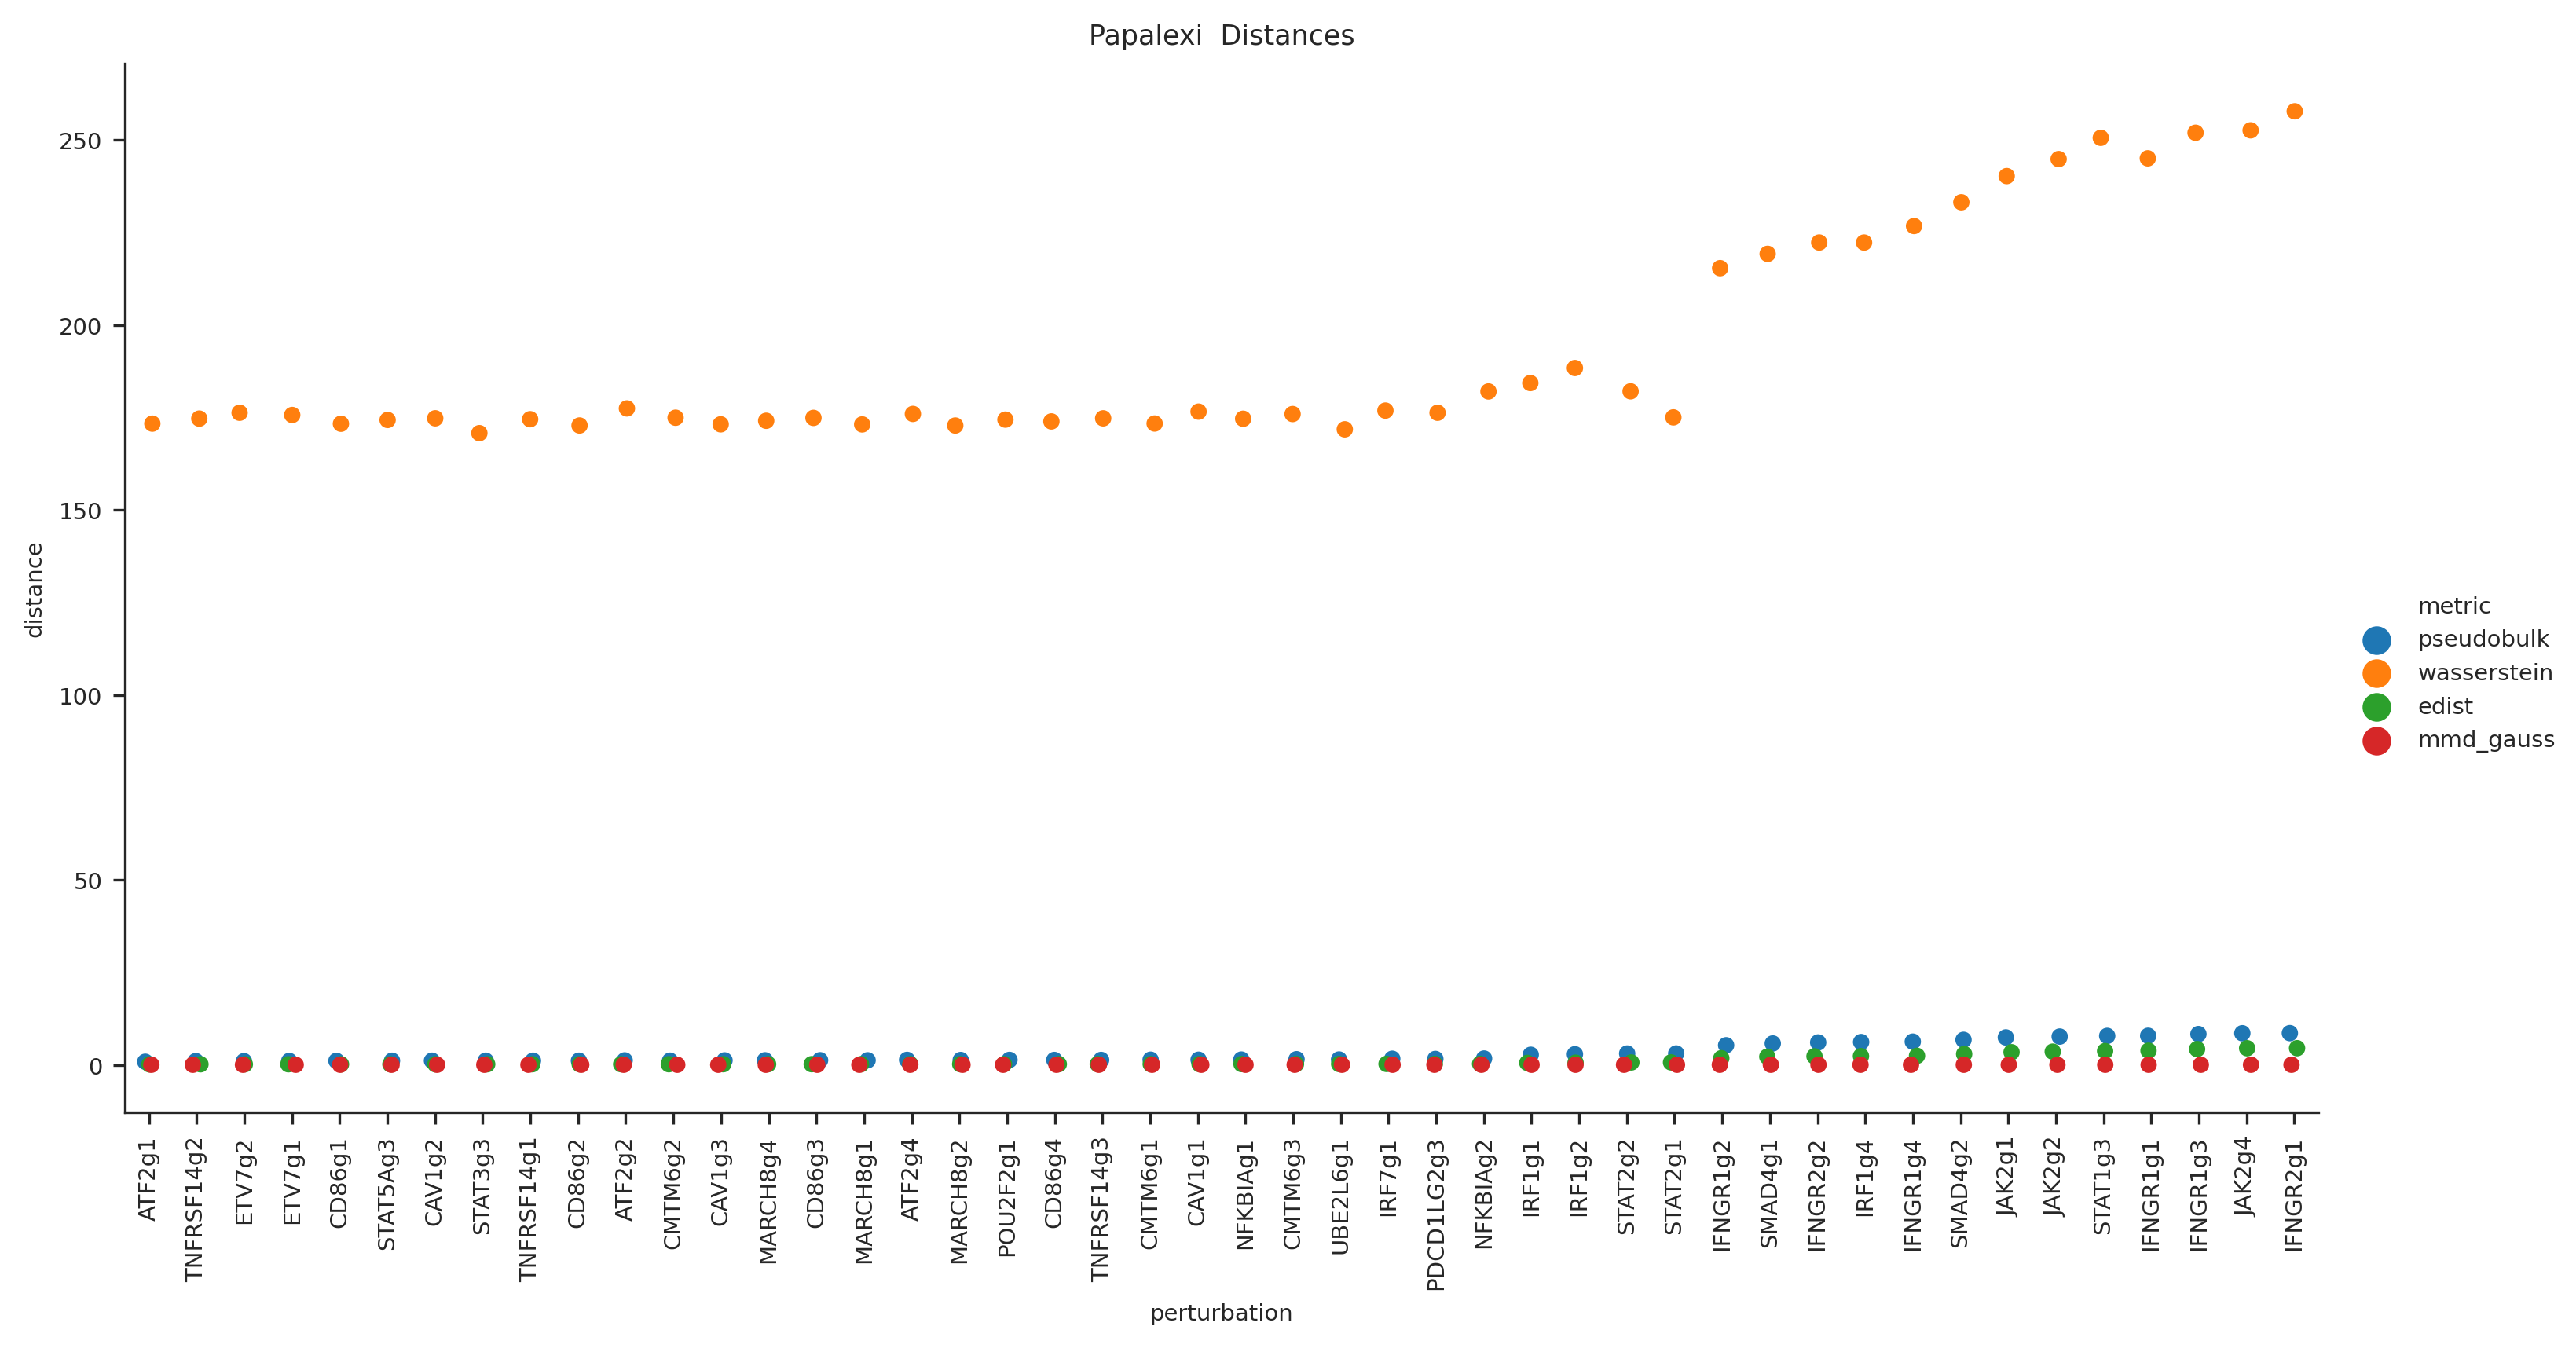

In [12]:
g2 = sns.catplot(data = magma, x = 'perturbation', y = 'distance', hue = 'metric', order =magnitudes.sort_values('edist')['perturbation'] ,
                aspect=2)
#g2.set(xticklabels=[])  
g2.set(title="Papalexi  Distances")
plt.xticks(rotation=90)
plt.savefig(workingdir + "catplot.pdf", bbox_inches="tight")

#plt.yscale("log")

In [13]:
def normalize(df, leaveout= ["perturbation"]):
    result = df.copy()
    for feature_name in df.columns:
        if feature_name in leaveout:
            result[feature_name] = df[feature_name]
        else:
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [14]:
normed_mag = normalize(magnitudes)

In [15]:
normed_magma = pd.melt(normed_mag, id_vars= "perturbation")
normed_magma.columns = ['perturbation','metric','distance']


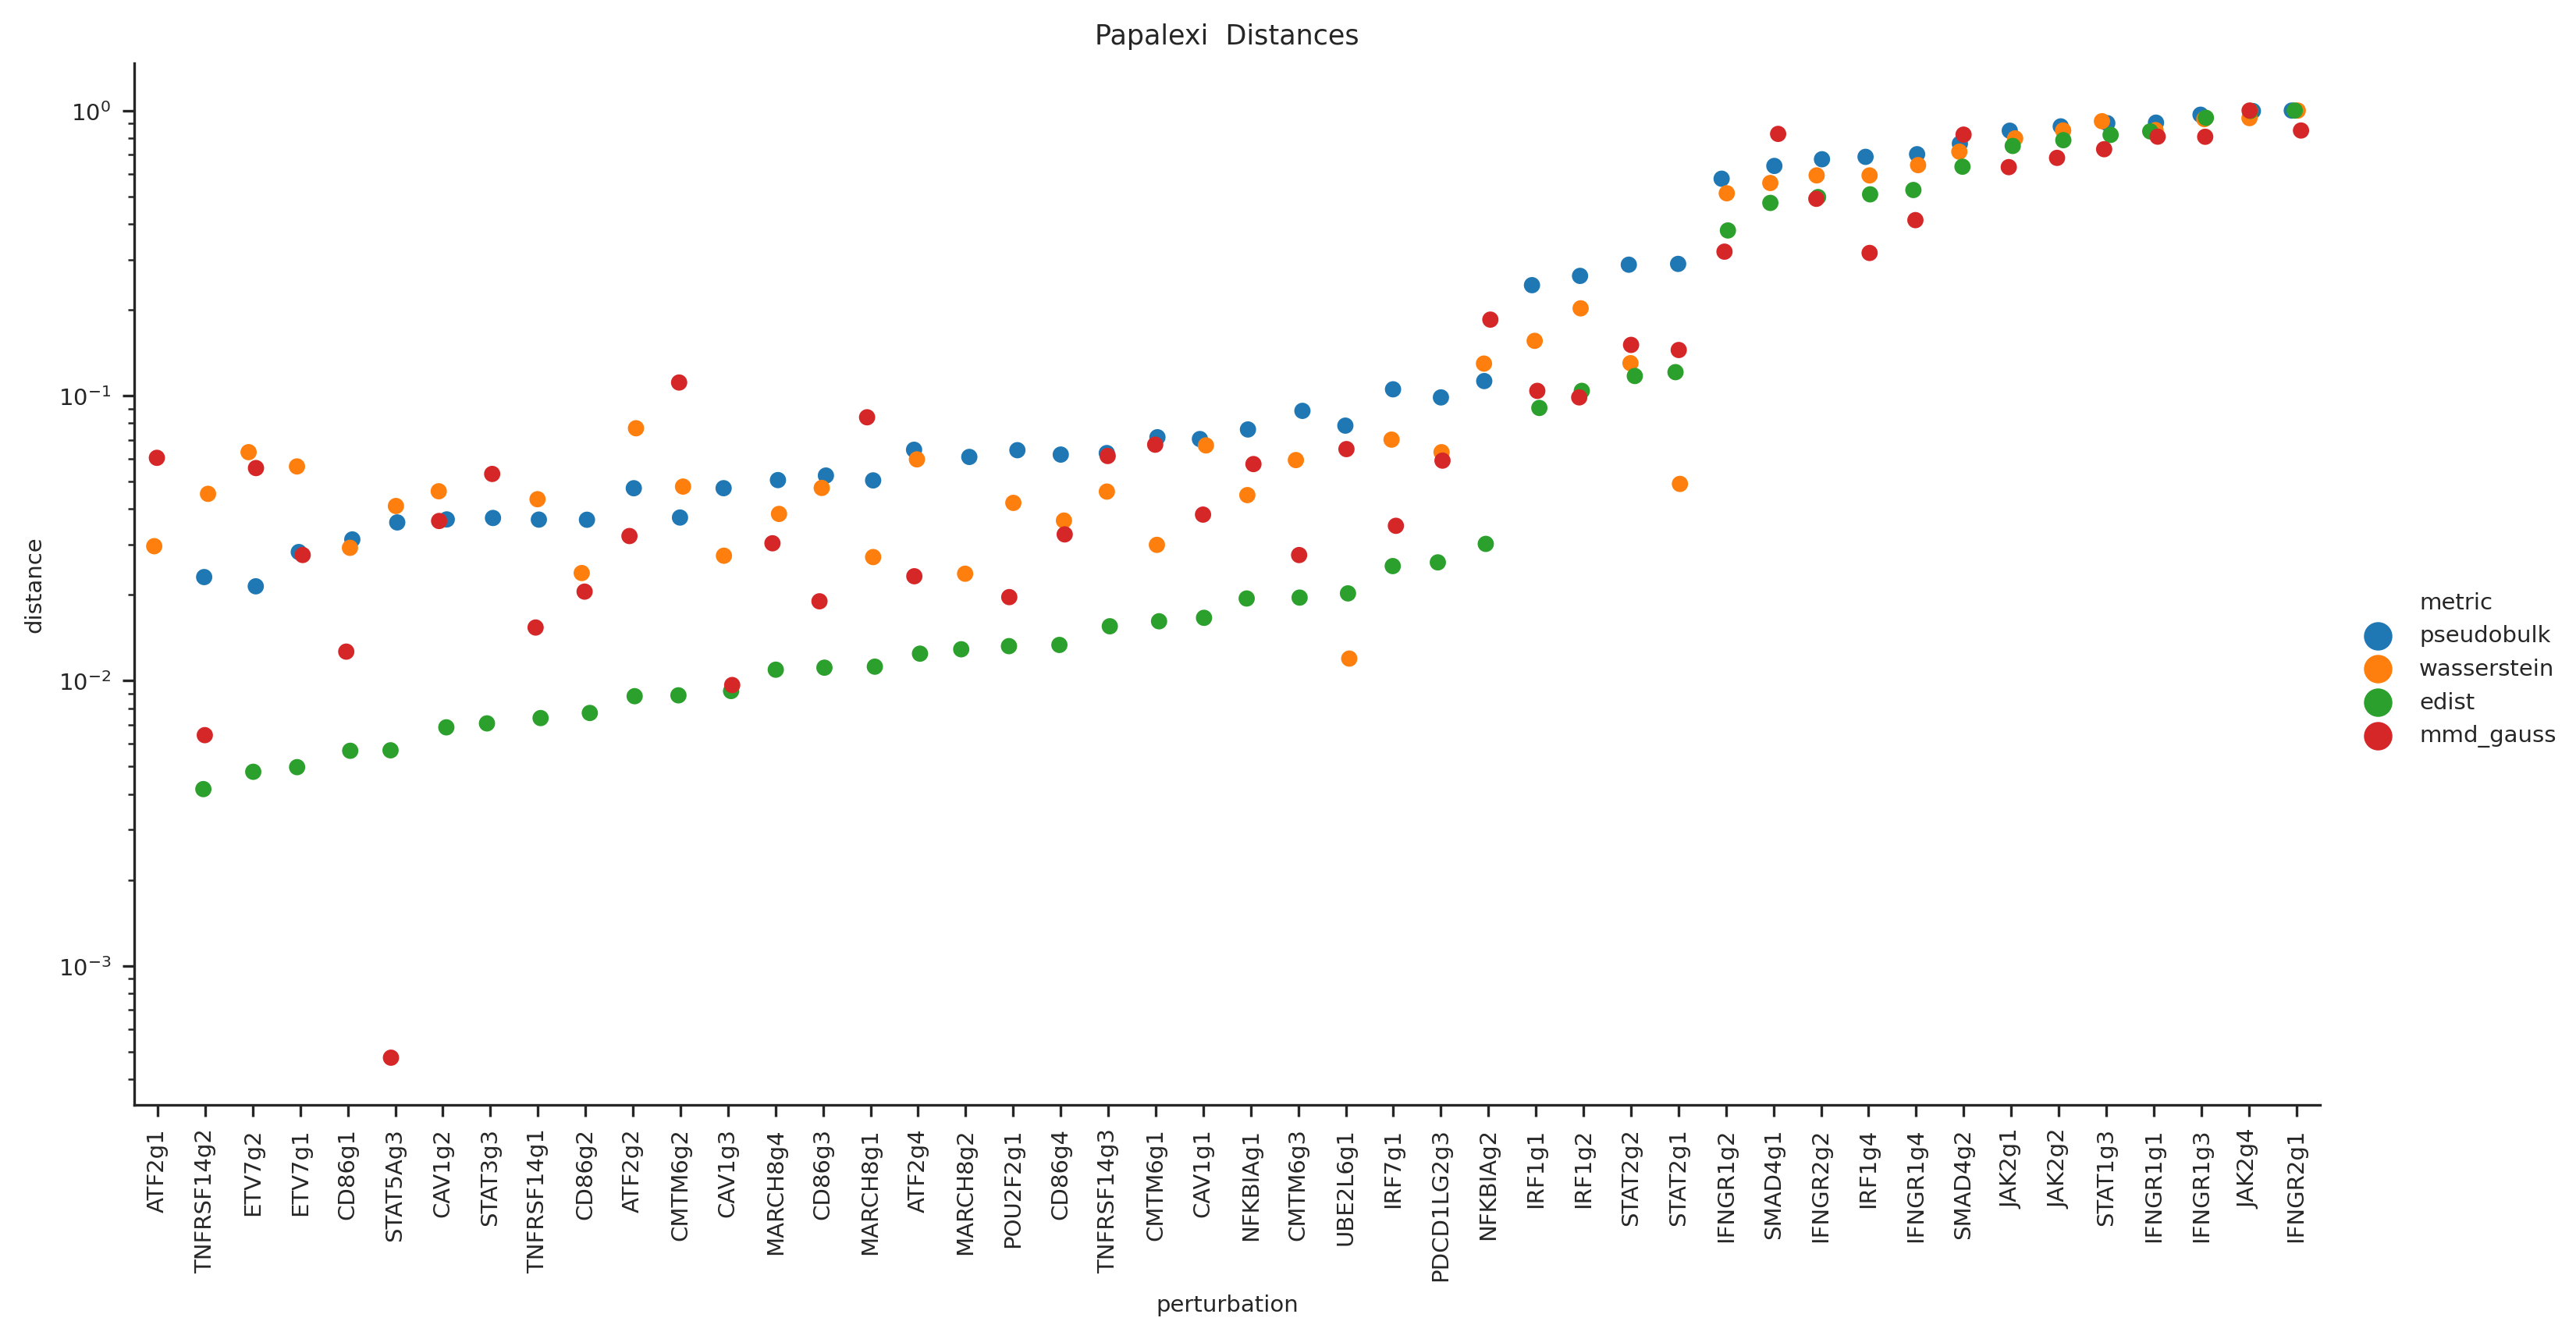

In [16]:
g2 = sns.catplot(data = normed_magma, x = 'perturbation', y = 'distance', hue = 'metric', order =magnitudes.sort_values('edist')['perturbation'] ,
                aspect=2)
#g2.set(xticklabels=[])  
g2.set(title="Papalexi  Distances")
#g2.set_yscale("log")
plt.xticks(rotation=90)
plt.yscale("log")
plt.savefig(workingdir + "catplot_log_minmax_norm.pdf", bbox_inches="tight")

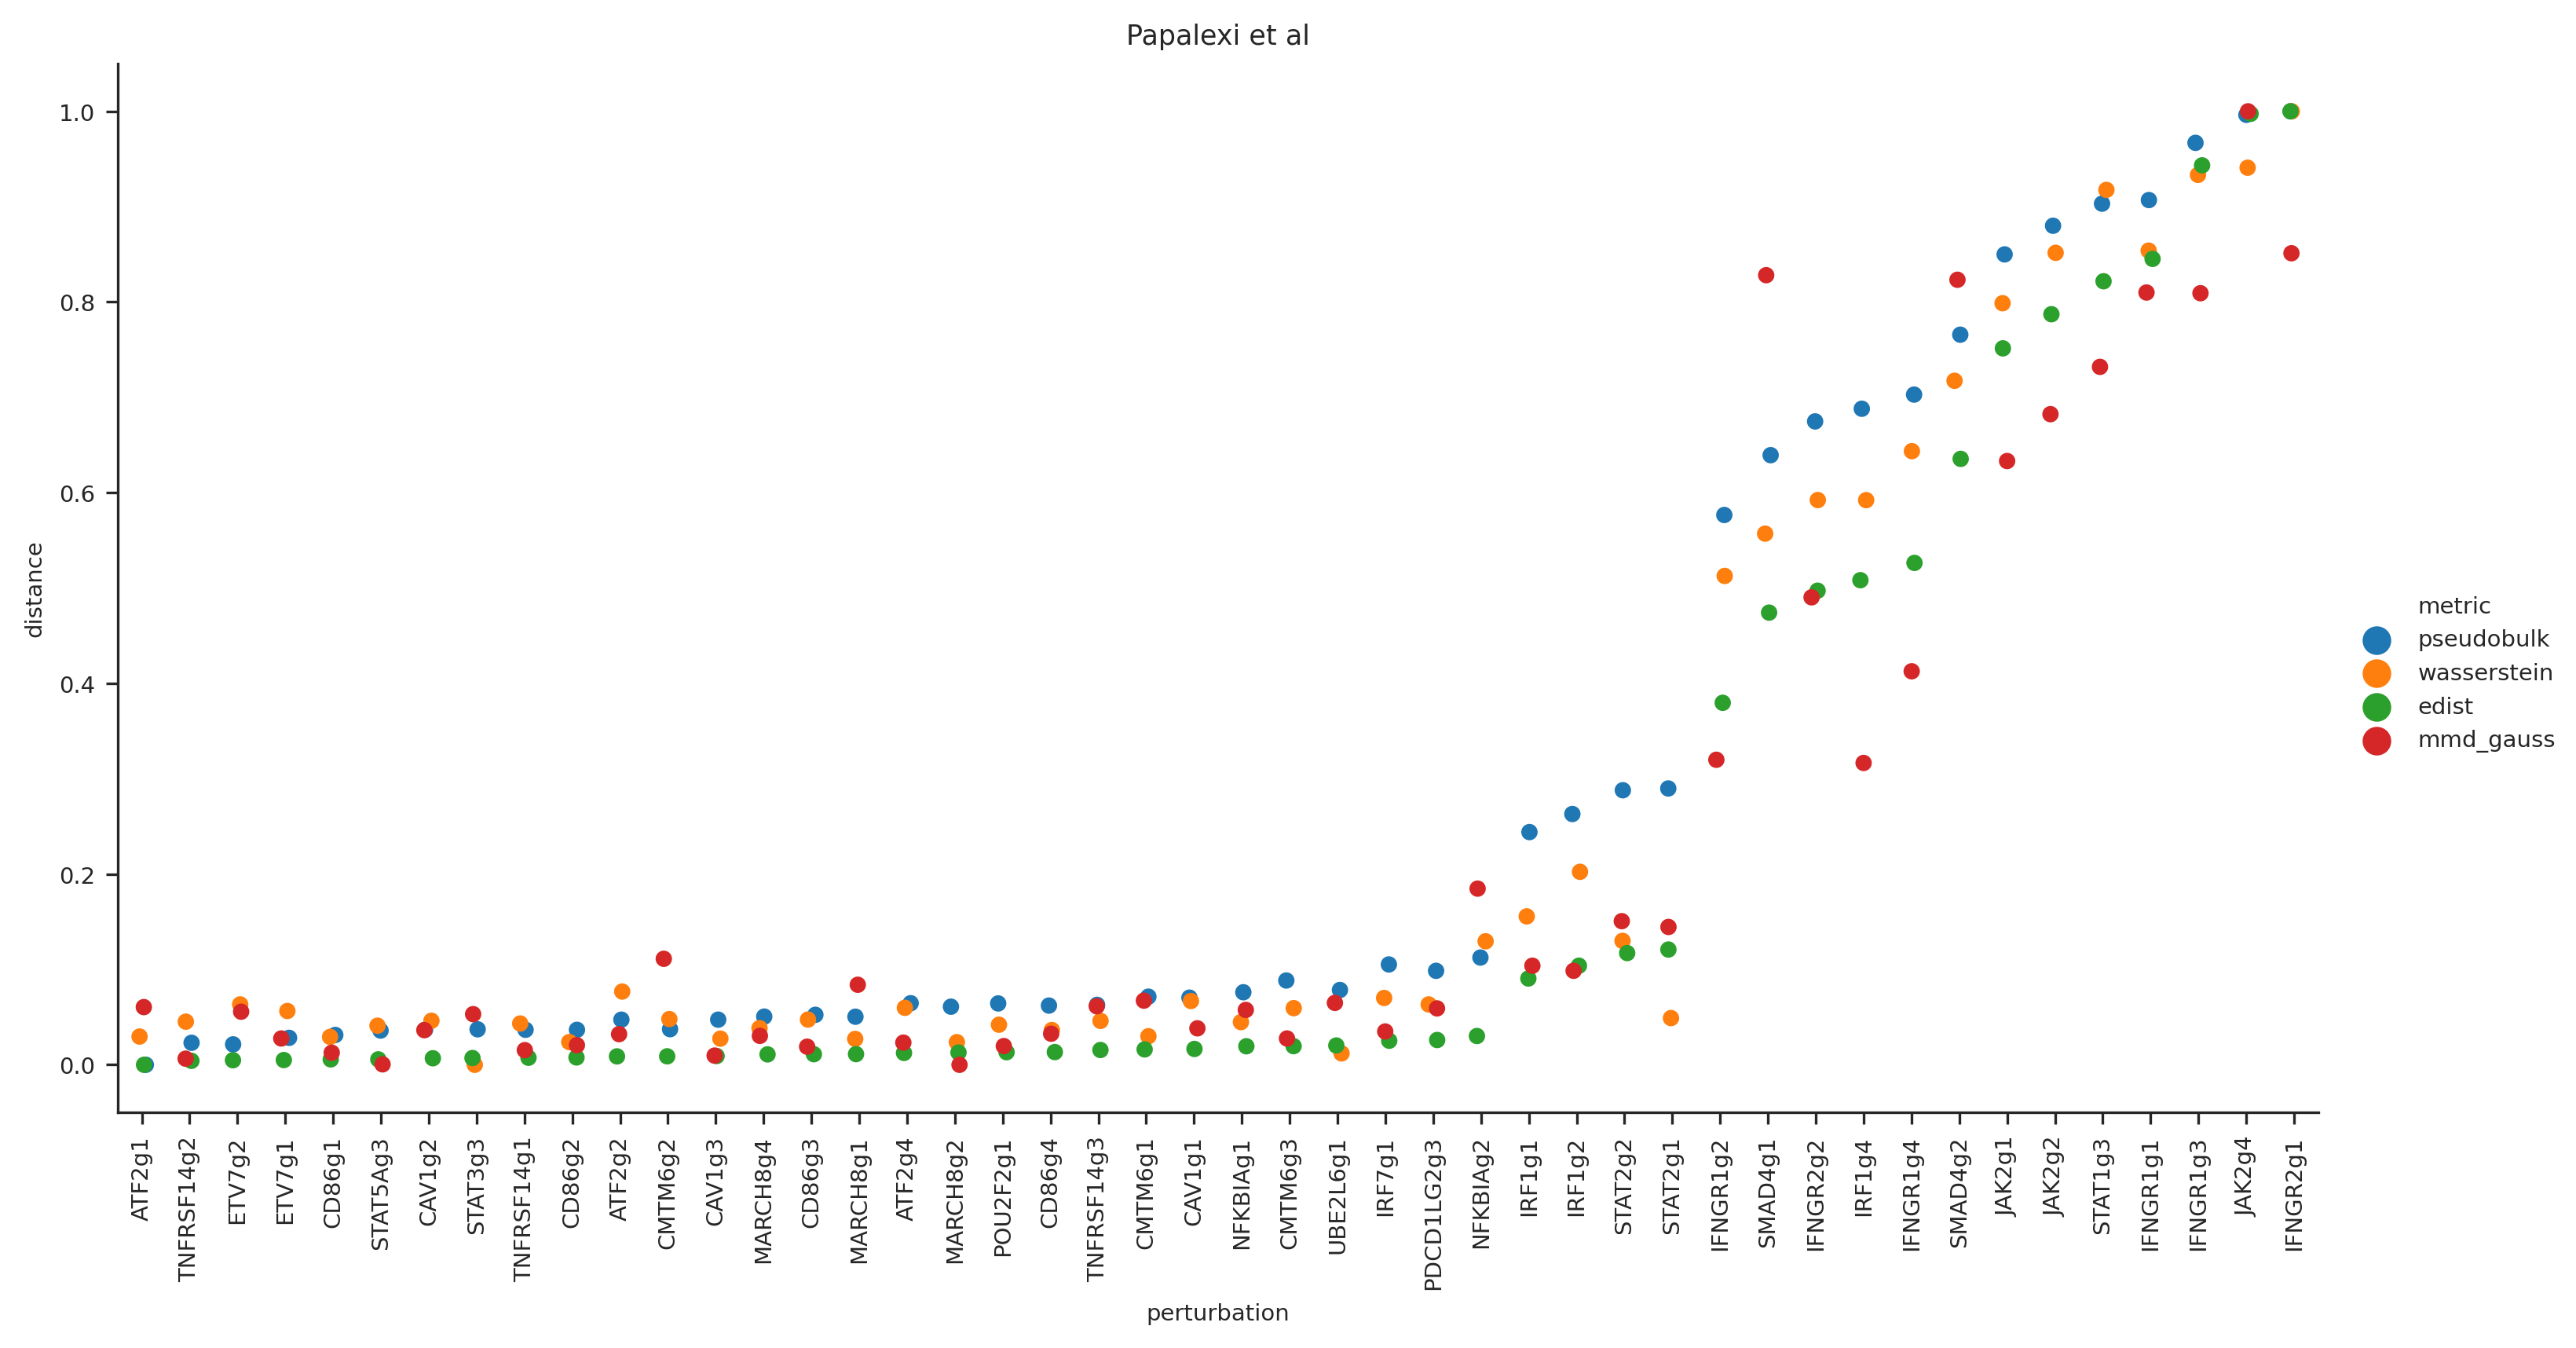

In [17]:
g2 = sns.catplot(data = normed_magma, x = 'perturbation', y = 'distance', hue = 'metric', order =magnitudes.sort_values('edist')['perturbation'] ,
                aspect=2)
#g2.set(xticklabels=[])  
g2.set(title=fig_title  )
plt.xticks(rotation=90)
plt.savefig(workingdir + "catplot_minmax_norm.pdf", bbox_inches="tight")


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, ''),
  Text(10, 0, ''),
  Text(11, 0, ''),
  Text(12, 0, ''),
  Text(13, 0, ''),
  Text(14, 0, ''),
  Text(15, 0, ''),
  Text(16, 0, ''),
  Text(17, 0, ''),
  Text(18, 0, ''),
  Text(19, 0, ''),
  Text(20, 0, ''),
  Text(21, 0, ''),
  Text(22, 0, ''),
  Text(23, 0, ''),
  Text(24, 0, ''),
  Text(25, 0, ''),
  Text(26, 0, ''),
  Text(27, 0, ''),
  Text(28, 0, ''),
  Text(29, 0, ''),
  Text(30, 0, ''),
  Text(31, 0, ''),
  Text(32, 0, ''),
  Text(33, 0, ''),
  Text(34, 0, ''),
  Text(35, 0, ''),
  Text(36, 0, ''),
  Text(37, 0, ''),
  Text(38, 0, ''),
  Text(39, 0, ''),
  Text(40, 0, ''),
  Text(41, 0, ''),
  

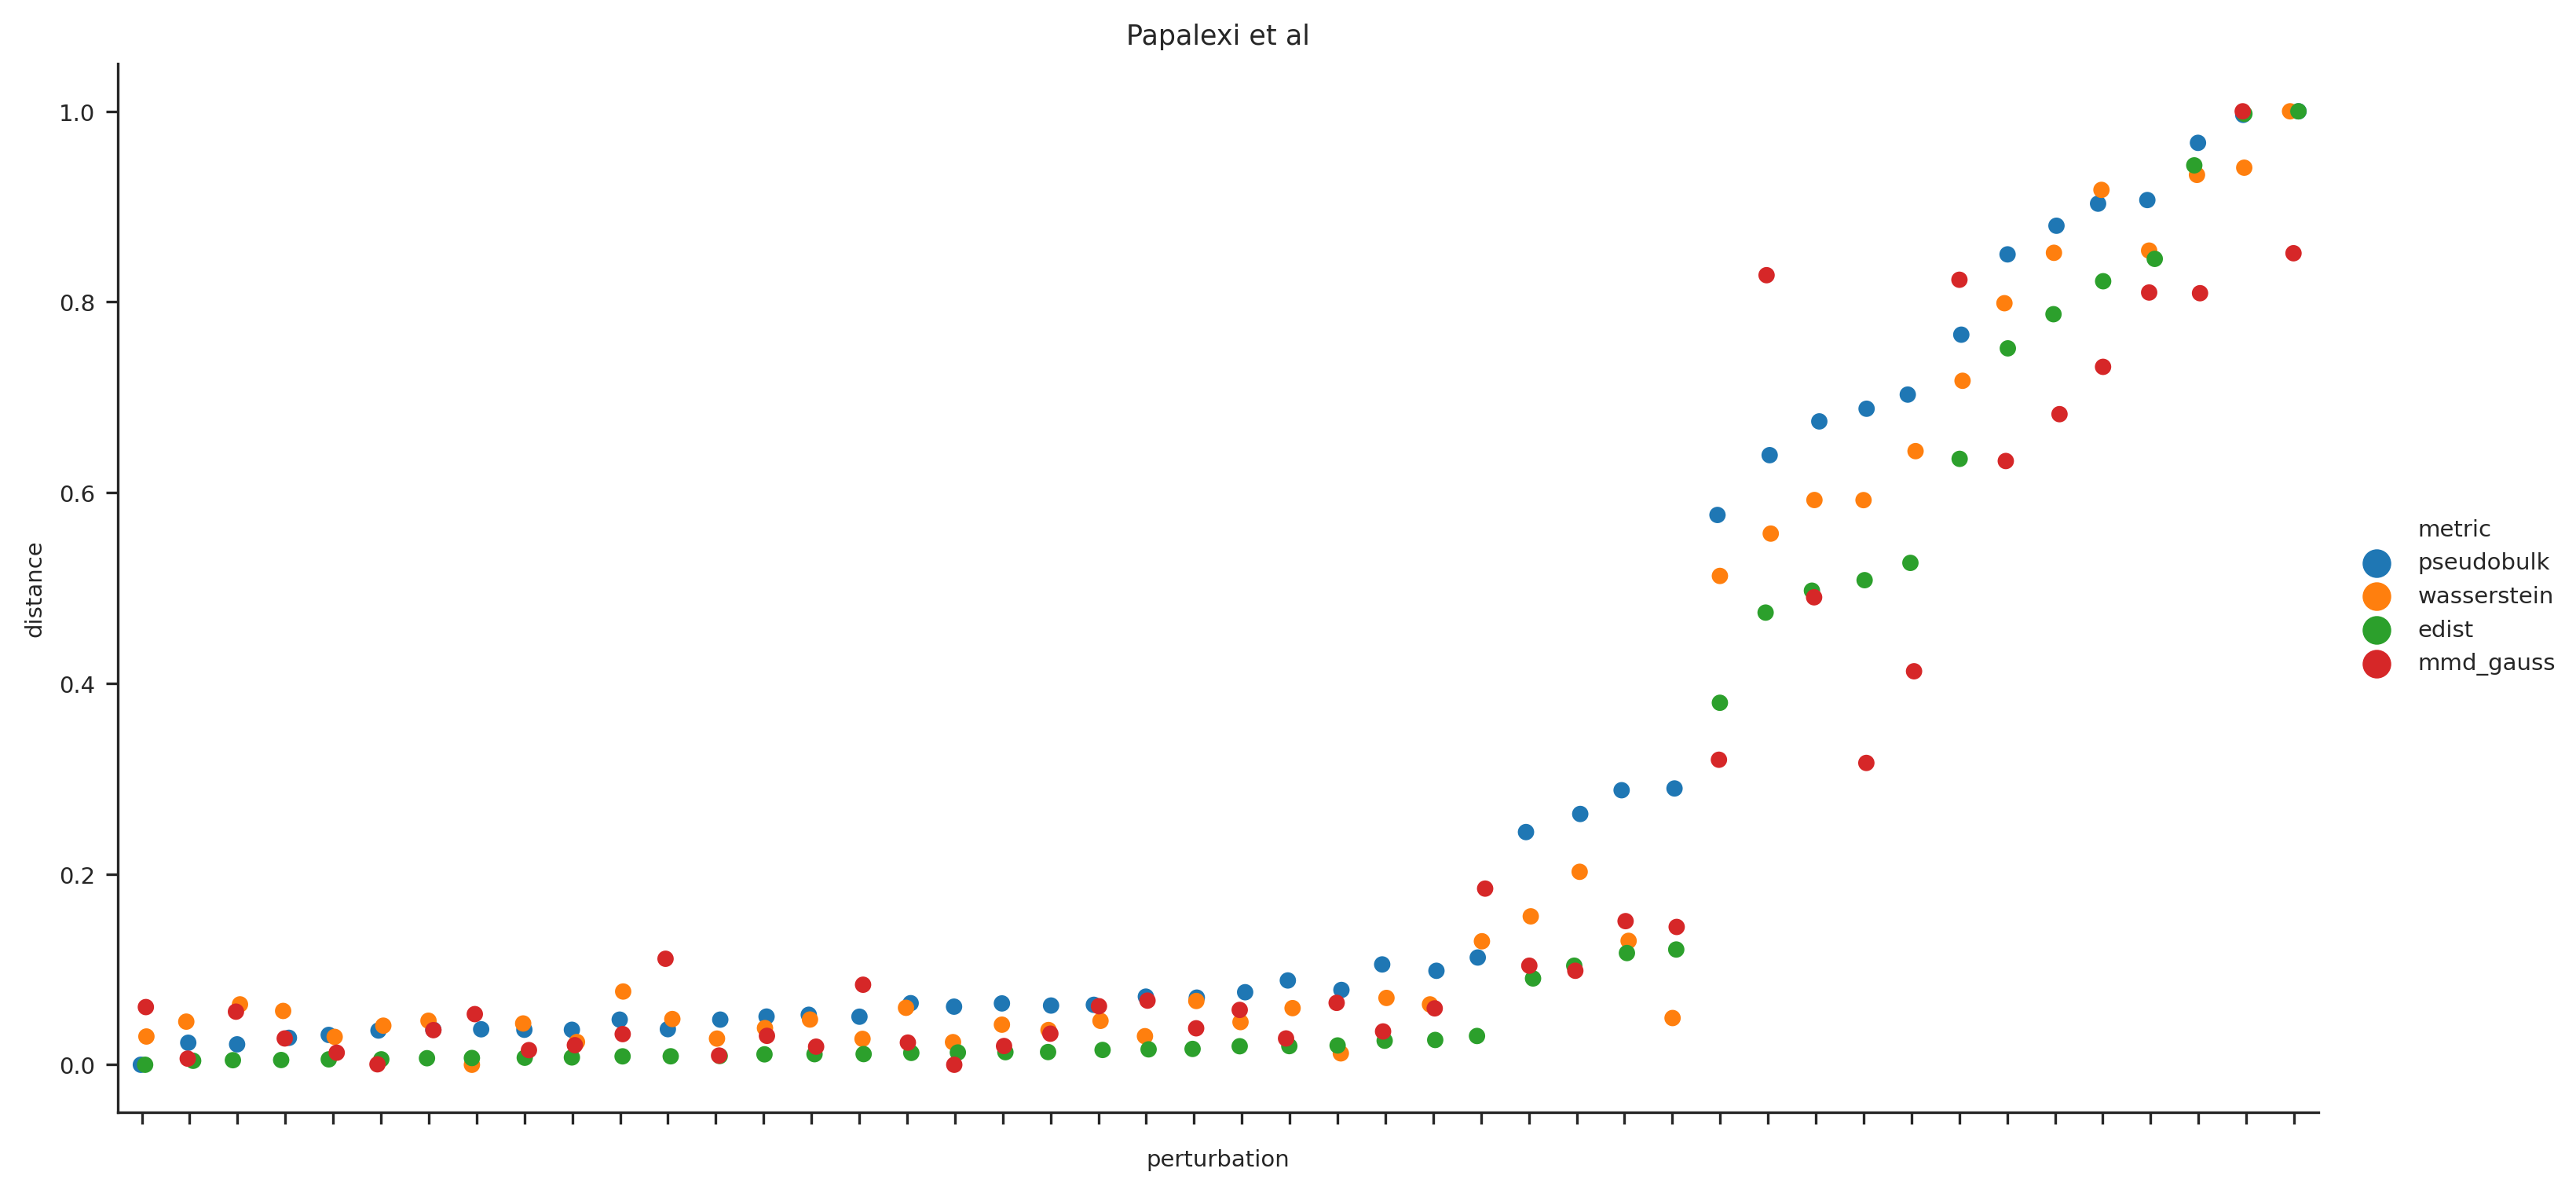

In [19]:
g2 = sns.catplot(data = normed_magma, x = 'perturbation', y = 'distance', hue = 'metric', order =magnitudes.sort_values('edist')['perturbation'] ,
                aspect=2)
#g2.set(xticklabels=[])  
g2.set(title=fig_title,)

plt.xticks(rotation=90)

